# Prueba de proyecciones y posición del sol 
# (todas son proyecciones de la densidad de gas)

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
plt.ion()
import yt
#yt.enable_parallelism()
from tools import my_field_def, unit_base, subhalo_center, ray_end_from_sph, make_projection, get_2Mpc_LG_dataset, get_mw_center_2Mpc_LG

In [2]:
ds = get_2Mpc_LG_dataset()

mw_center = get_mw_center_2Mpc_LG()

yt : [INFO     ] 2019-02-05 14:59:32,204 Calculating time from 1.000e+00 to be 4.336e+17 seconds
yt : [INFO     ] 2019-02-05 14:59:32,236 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-05 14:59:32,237 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-05 14:59:32,238 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-05 14:59:32,239 Parameters: domain_right_edge         = [64000. 64000. 64000.]
yt : [INFO     ] 2019-02-05 14:59:32,240 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-05 14:59:32,241 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-05 14:59:32,248 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-05 14:59:32,249 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-05 14:59:32,250 Parameters: hubble_constant           = 0.7


# Proyección en el plano YZ de la simulación, centrada en el MW center; con 10 kpc/h de lado

yt : [INFO     ] 2019-02-03 20:41:45,885 Projection completed
yt : [INFO     ] 2019-02-03 20:41:45,886 xlim = 32705.150391 32725.150391
yt : [INFO     ] 2019-02-03 20:41:45,886 ylim = 32887.707031 32907.707031
yt : [INFO     ] 2019-02-03 20:41:45,887 xlim = 32705.150391 32725.150391
yt : [INFO     ] 2019-02-03 20:41:45,887 ylim = 32887.707031 32907.707031
yt : [INFO     ] 2019-02-03 20:41:45,888 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



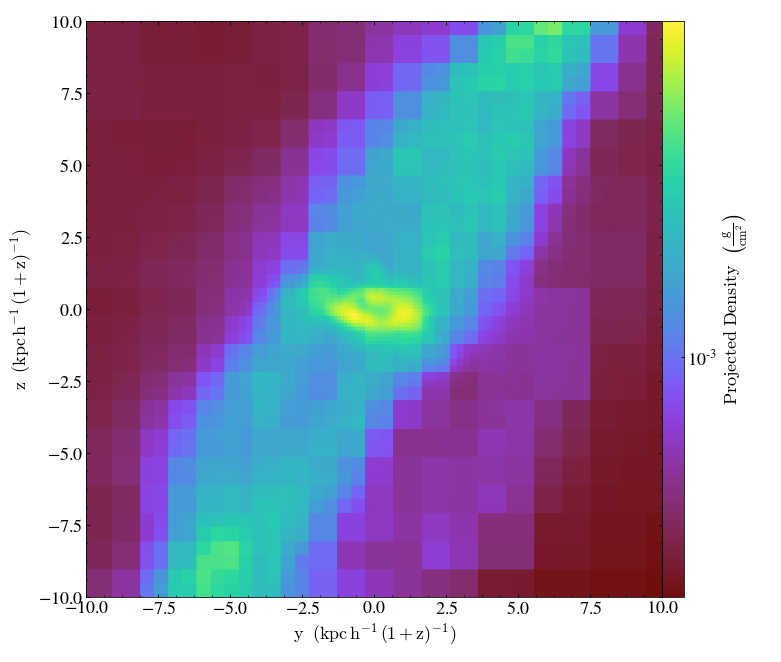

In [24]:
px = make_projection(ds, mw_center, 20, 'x')
px.show()

## se le puede superponer una circunferencia fácilmente


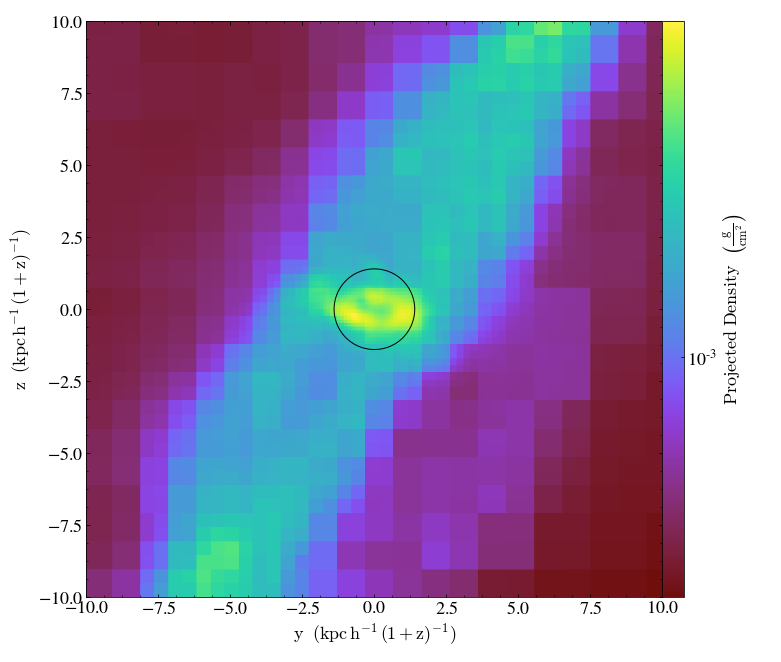

In [5]:

px.annotate_sphere(list(mw_center), radius=(2, 'kpc'),
                  circle_args={'color':'black'})

### Acá uso la matriz de rotación para obtener el nuevo eje z en las coordenadas viejas (i.e. de la simulación)

In [3]:
rot = np.array([[0.38444049,-0.89949922,-0.20762143],
       [0.70601157,0.43138525,-0.56165330],
       [0.59477153,0.069339139,0.80089882]])

In [7]:
rot

array([[ 0.38444049, -0.89949922, -0.20762143],
       [ 0.70601157,  0.43138525, -0.5616533 ],
       [ 0.59477153,  0.06933914,  0.80089882]])

In [4]:
new_z_axis = rot.transpose() @ np.array([0,0,1])
new_z_axis *= 2/np.linalg.norm(new_z_axis)
# point_to_perp = mw_center + z_axis
# point_to_perp *= 2/np.linalg.norm(point_to_perp)
# point_to_perp += mw_center

In [9]:
print(new_z_axis)
# point_to_perp

[1.18954305 0.13867828 1.60179763]


## Acá le anoto el vector perpendicular al disco (en blanco) sobre la proyección


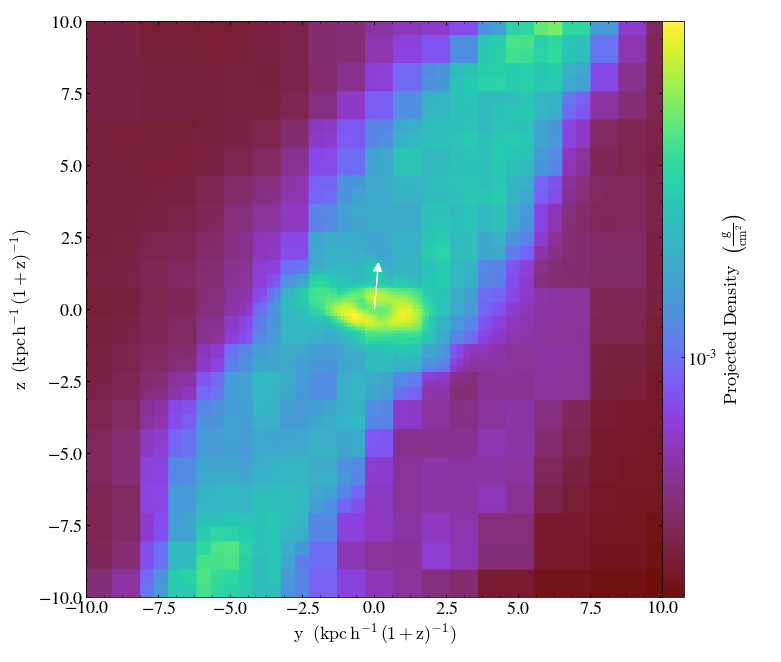

In [36]:
px.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)

### elijo algún vector perpendicular al nuevo eje Z, para tomar la posición del sol sobre el disco

In [5]:
r = np.cross(new_z_axis, [1,0,0])
r *= 10*0.7/np.linalg.norm(r)

In [6]:
r_sun = mw_center + r
print(mw_center)
print(r_sun)

[21819.64  32715.15  32897.707]
[21819.640625   32722.12430288 32897.10325327]


## acá anoto también el vector con la posición del sol, en rojo


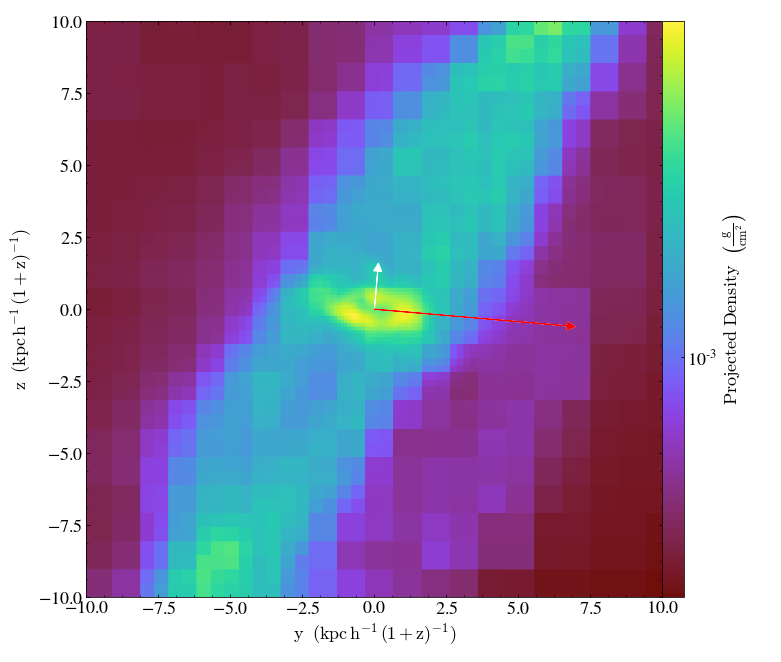

In [40]:
px.annotate_arrow(pos = r_sun, starting_pos=mw_center, plot_args={'color':'red'})

## Ahora, hago las otras dos proyecciones sobre los planos XY, XZ (en coornenadas de la simulación) y anoto los dos mismos vectores


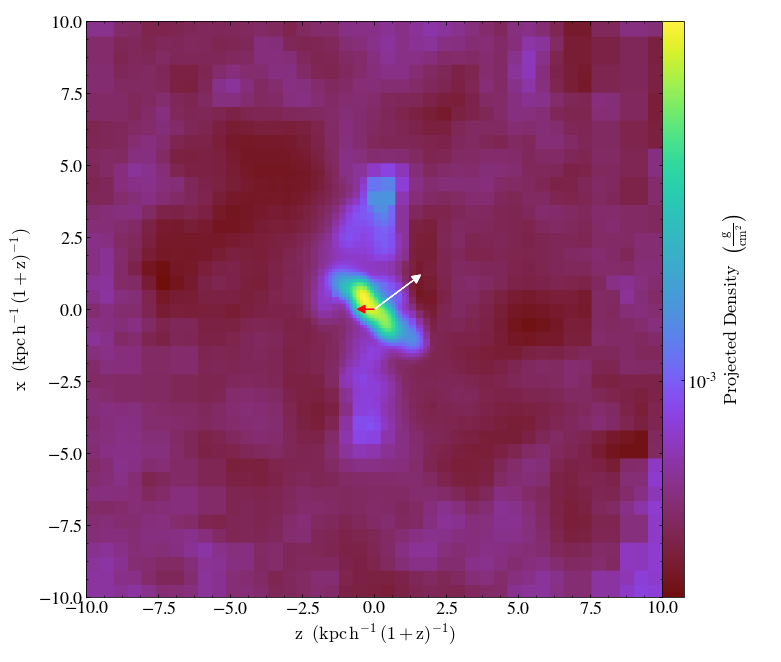

In [41]:
py = make_projection(ds, mw_center, 20, 'y')
py.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)
py.annotate_arrow(pos = r_sun, starting_pos=mw_center, plot_args={'color':'red'})
py.show()


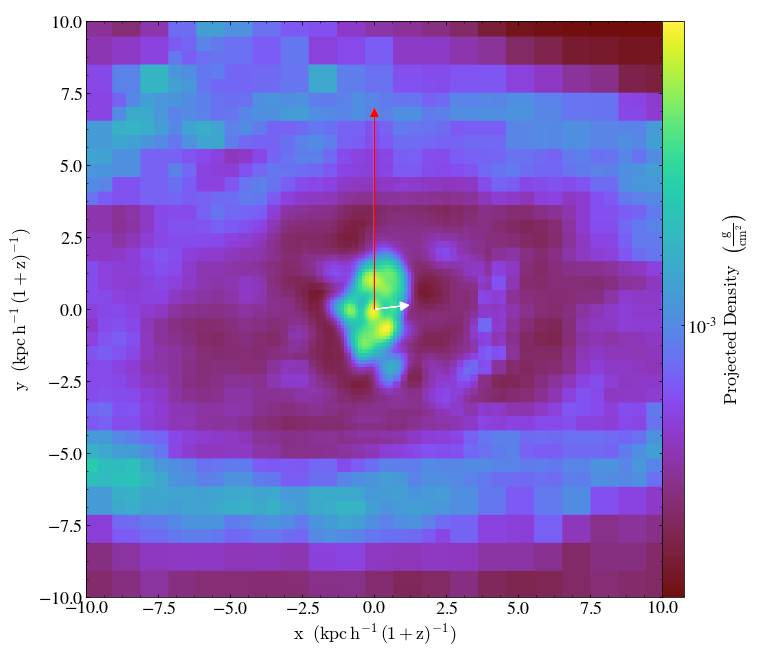

In [42]:
pz = make_projection(ds, mw_center, 20, 'z')
pz.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)
pz.annotate_arrow(pos = r_sun, starting_pos=mw_center, plot_args={'color':'red'})
pz.show()

## también se pueden hacer otras giladas como cambiarle el colormap o sobreplotear las celdas del octree


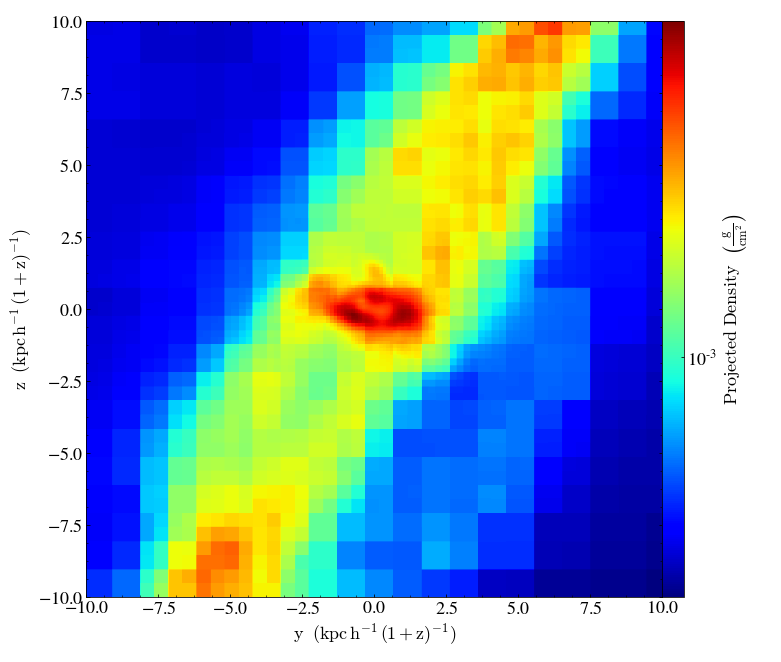

In [23]:
px.set_cmap('density', 'jet')


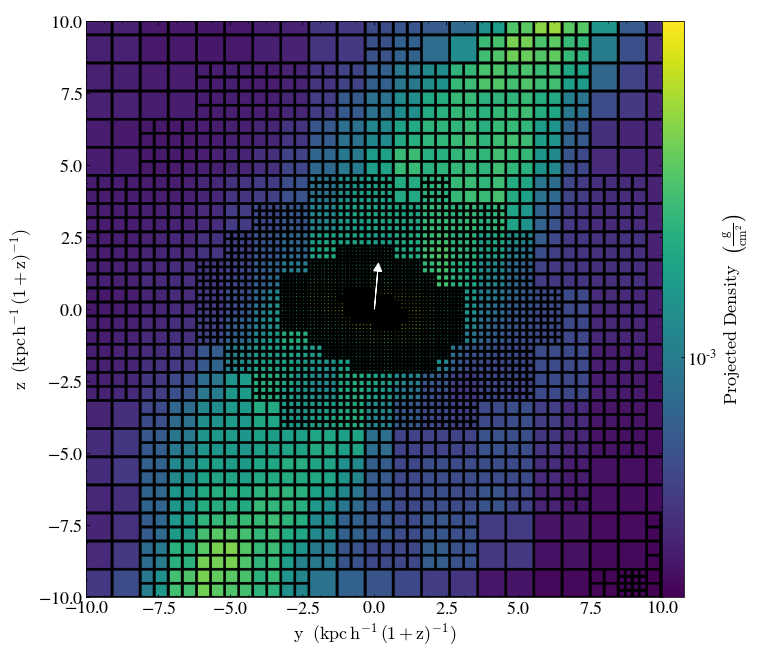

In [18]:
px.annotate_cell_edges()


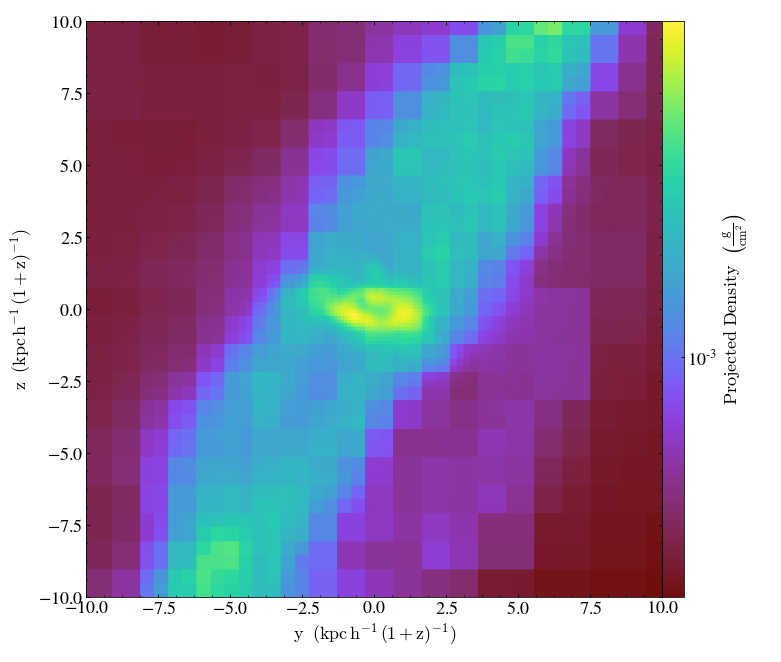

In [35]:
px.annotate_clear()

# Ahora, hago una proyección sobre el plano del disco (i.e. perpendicular al nuevo eje z, *face on*)

yt : [INFO     ] 2019-02-05 15:03:47,373 Allocating for 1.111e+07 particles (index particle type 'all')
yt : [INFO     ] 2019-02-05 15:03:49,206 Identified 7.123e+05 octs
yt : [INFO     ] 2019-02-05 15:03:50,525 xlim = -65.000000 65.000000
yt : [INFO     ] 2019-02-05 15:03:50,526 ylim = -65.000000 65.000000
yt : [INFO     ] 2019-02-05 15:03:50,527 zlim = -32000.000000 32000.000000
yt : [INFO     ] 2019-02-05 15:03:50,528 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



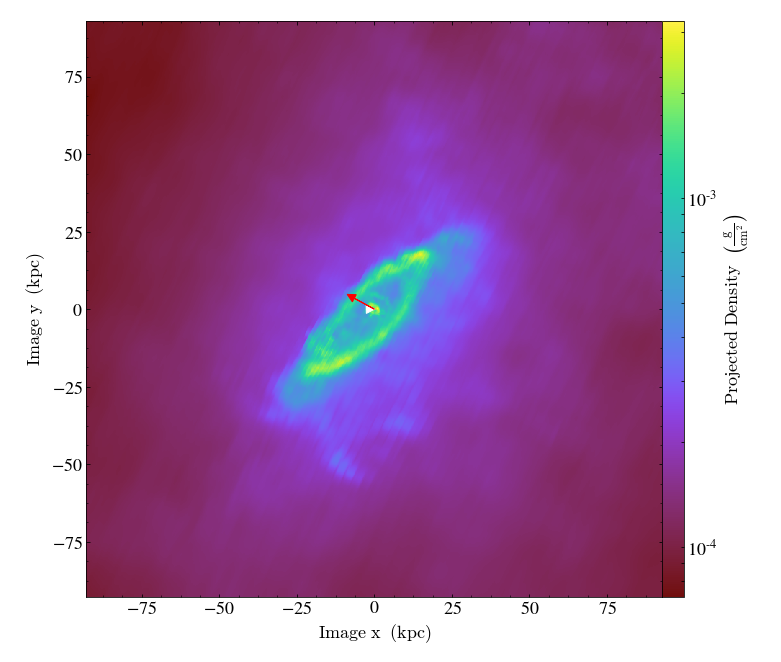

In [7]:
p_disk = yt.OffAxisProjectionPlot(ds, center=mw_center, normal=new_z_axis, width=130, north_vector=rot.transpose()@[0,1,0], fields="density")
p_disk.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)
p_disk.annotate_arrow(pos = r_sun, starting_pos=mw_center, plot_args={'color':'red'})
p_disk.show()


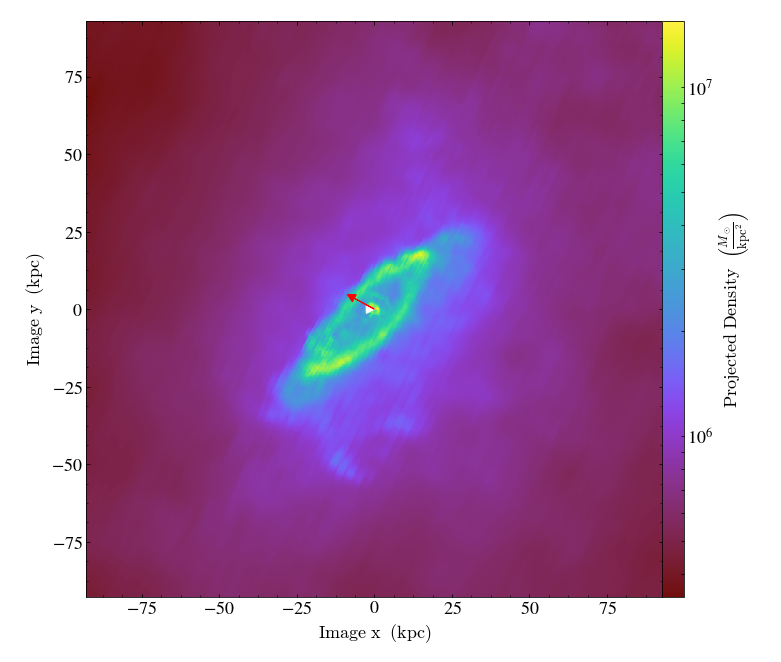

In [10]:
p_disk.set_unit('density', 'Msun/kpc**2')

# Y también una sobre un plano que contenga al nuevo eje z (i.e. *edge on*)

yt : [INFO     ] 2019-02-05 15:08:50,124 xlim = -65.000000 65.000000
yt : [INFO     ] 2019-02-05 15:08:50,125 ylim = -65.000000 65.000000
yt : [INFO     ] 2019-02-05 15:08:50,125 zlim = -32000.000000 32000.000000
yt : [INFO     ] 2019-02-05 15:08:50,126 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



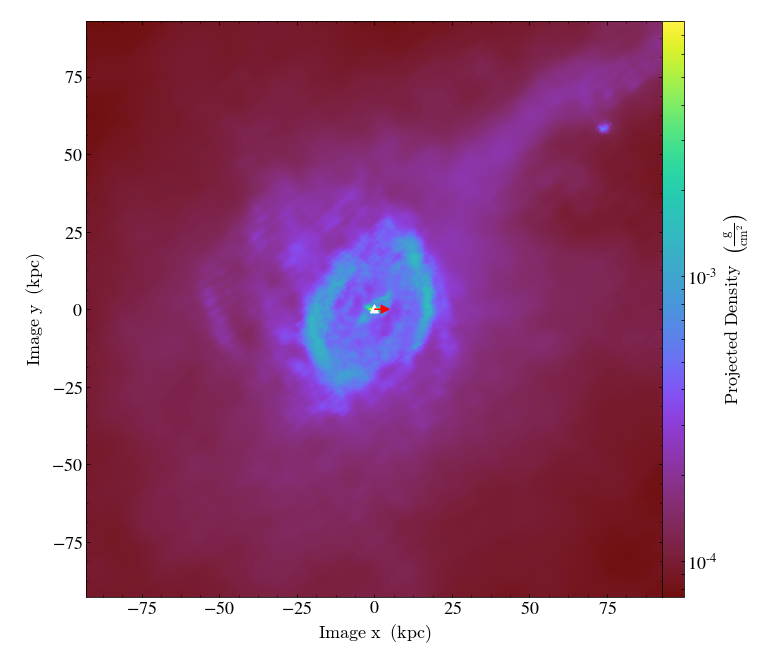

In [8]:
p_edge = yt.OffAxisProjectionPlot(ds, center=mw_center, normal=rot.transpose()@[1,0,0], width=130, north_vector=new_z_axis, fields="density")
p_edge.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)
p_edge.annotate_arrow(pos = r_sun, starting_pos=mw_center, plot_args={'color':'red'})
p_edge.show()



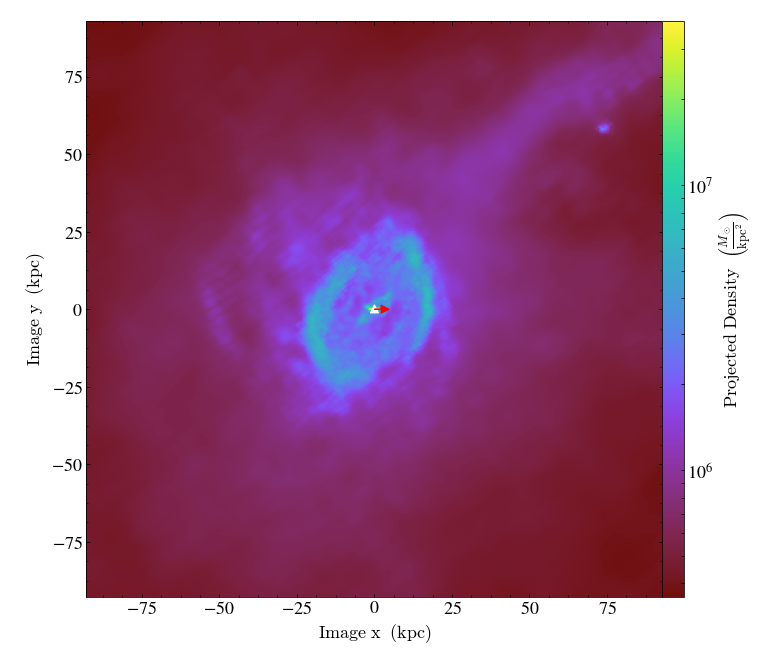

In [11]:
p_edge.set_unit('density', 'Msun/kpc**2')